Insights

In [6]:
# 1. What are the most popular airports to travel to?
# 2. What days have the greatest number of flights?
# 3. What are the most popular origin and destination Airport combinations?
# 4. Are flights which cover longer distance more likely to be delayed?
# 5. What flights have the greatest difference between Time and Mean Time for that specific origin and destination?
# 6. Which Airline has the highest proportion of delayed flights?
# 7. Which Airlines have the highest average speed?
# 8. How does Distance Vs Time vary between Airlines (Interactive)
# 9. Which Airlines have the greatest number of flights by day?
#10. What are the most frequent airports travelled to by Airline?


Setup

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from random import randint

flight_path = 'airlines_delay.csv.zip'
flight_data= pd.read_csv(flight_path)

print('Setup Complete')

flight_data.head()

Setup Complete


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


1. What are the most popular airports to travel to?

<Figure size 1000x1000 with 0 Axes>

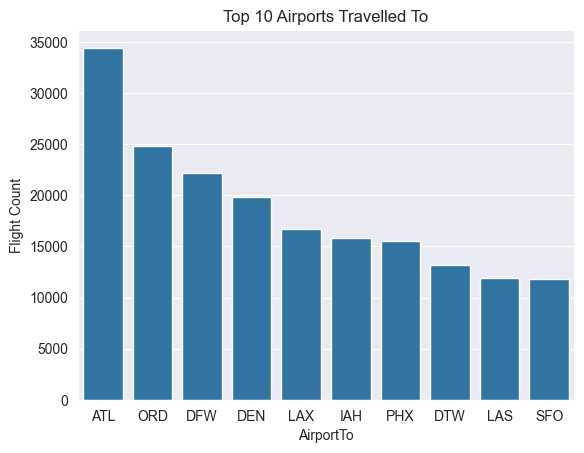

<Figure size 1000x1000 with 0 Axes>

In [191]:
columns = flight_data.columns
#print(columns)

flights_by_airport_to = flight_data.groupby(['AirportTo']).Class.count() #Count of flights to each airport
flights_by_airport_to.sort_values(ascending=False) #Order by count descending

top10 = flights_by_airport_to.sort_values(ascending=False).iloc[0:10] #Select top 10

plt.ylabel('Flight Count')
plt.title('Top 10 Airports Travelled To')
sns.barplot(top10)
plt.figure(figsize = (10,10))


2. What days have the greatest number of flights?

In [181]:
flight_data.head()

def get_day_name(row):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    row['DayName']= days[int(row.DayOfWeek)-1] #Selects the name which correlates to the day number in the week
    return row

day_as_name = flight_data.apply(get_day_name, axis='columns') #Applies the function to all rows to get day name
day_as_name.head()


,Flight,Time,Distance,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Speed,DayName
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,0.108796,Monday
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,0.405556,Thursday
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,0.122222,Wednesday
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,0.243972,Saturday
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,0.141618,Thursday


,DayName,count
3,Monday,72769
4,Tuesday,71340
1,Wednesday,89746
0,Thursday,91445
2,Friday,85247
6,Saturday,58956
5,Sunday,69879


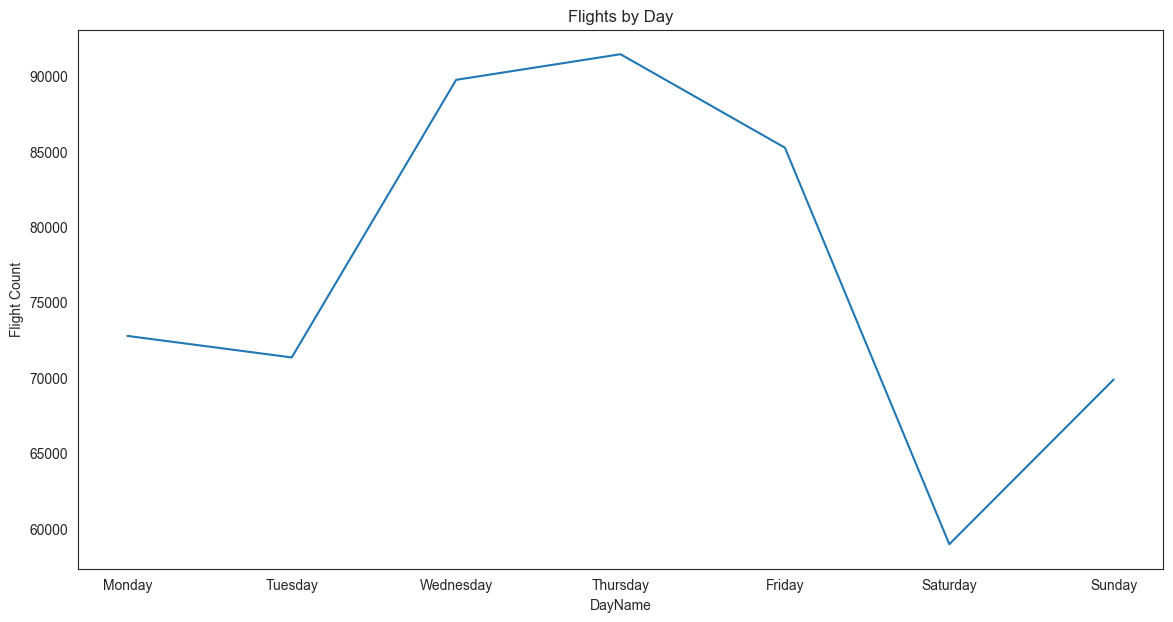

In [116]:
flights_by_day = day_as_name[[ 'DayName', 'DayOfWeek']].value_counts().reset_index().sort_values('DayOfWeek') #Counts flights on each day
plt.figure(figsize=(14,7))
plt.title('Flights by Day')
plt.ylabel('Flight Count')
sns.lineplot(x='DayName', y='count', data=flights_by_day)
flights_by_day[['DayName','count']]


3. What are the most popular origin and destination Airport combinations?

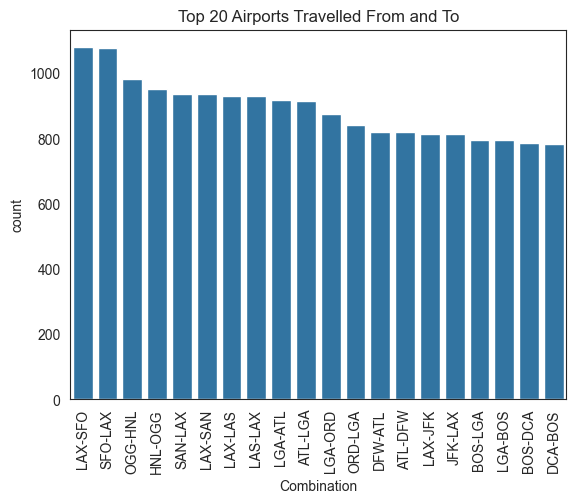

In [119]:
flight_data.head()
origin_and_dest = flight_data[['AirportFrom', 'AirportTo']].value_counts().reset_index().sort_values('count', ascending=False)
#Groups by origin and destination airport and orders them in descending order
origin_and_dest.head()
origin_and_dest['Combination'] = origin_and_dest.AirportFrom + '-' + origin_and_dest.AirportTo #Creates new column which stores the origin and destination airport initials
Top20 = origin_and_dest[['Combination','count']].iloc[0:20] #Selects top 20 index's

plt.xticks(rotation=90) #Increases readability
plt.title('Top 20 Airports Travelled From and To')
sns.barplot(x='Combination', y='count', data=Top20)
sns.set_style('white')

4. Are flights which cover longer distance more likely to be delayed?

In [34]:
def is_delayed(row):
    if row.Class == 1:
        row.Class = True #Replaces 1 with True
    elif row.Class == 0:
        row.Class = False #Replaces 0 with False
    return row

delay_data = flight_data.apply(is_delayed, axis='columns') #Applies function to all rows
delay_data = delay_data.rename(columns={'Class':'Delayed'}) #Rename's the column to define it better
delay_data['Delayed']



0         False
1         False
2         False
3         False
4         False
          ...  
539377     True
539378     True
539379     True
539380     True
539381     True
Name: Delayed, Length: 539382, dtype: bool

<Axes: title={'center': 'Flights Length, Grouped by Delayed'}, xlabel='Delayed', ylabel='Length'>

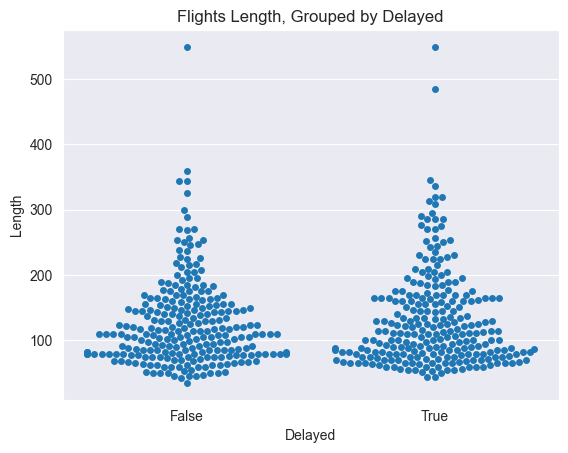

In [9]:
first_250_delayed = delay_data[delay_data['Delayed'] == True].iloc[0:250]  #Selects first 250 rows by index that are delayed
first_250_not_delayed = delay_data[delay_data['Delayed'] == False].iloc[0:250] #Selects first 250 rows by index that are not delayed

#Had to reduce the size of the data frame as >500,000 rows

five_hundred_flights = pd.concat([first_250_delayed, first_250_not_delayed]) #Merges the two dataframes to include 500 rows in a single dataframe

plt.title('Flights Length, Grouped by Delayed')
sns.swarmplot(x=five_hundred_flights['Delayed'], y=five_hundred_flights['Length'])


5. What flights have the greatest difference between Time and Mean Time for that specific origin and destination?

,AirportFrom,AirportTo,Flight,Time,Length,Airline,DayOfWeek,Class,Mean Journey Time,Time Difference
Index,,,,,,,,,,
0,ANC,MSP,2284.0,1305.0,324.0,DL,5,1,389.531250,915.468750
1,PDX,ORD,196.0,1401.0,234.0,UA,7,0,626.381579,774.618421
2,ANC,SEA,106.0,1350.0,202.0,AS,7,0,580.020134,769.979866
3,ANC,SEA,106.0,1350.0,202.0,AS,7,1,580.020134,769.979866
4,PDX,ORD,196.0,1394.0,235.0,UA,7,0,626.381579,767.618421
5,PDX,ORD,196.0,1391.0,235.0,UA,7,0,626.381579,764.618421
6,PDX,ORD,378.0,1390.0,238.0,UA,5,0,626.381579,763.618421
7,PHX,ATL,543.0,1439.0,208.0,FL,7,1,684.180982,754.819018
8,PHX,ATL,543.0,1439.0,208.0,FL,5,0,684.180982,754.819018


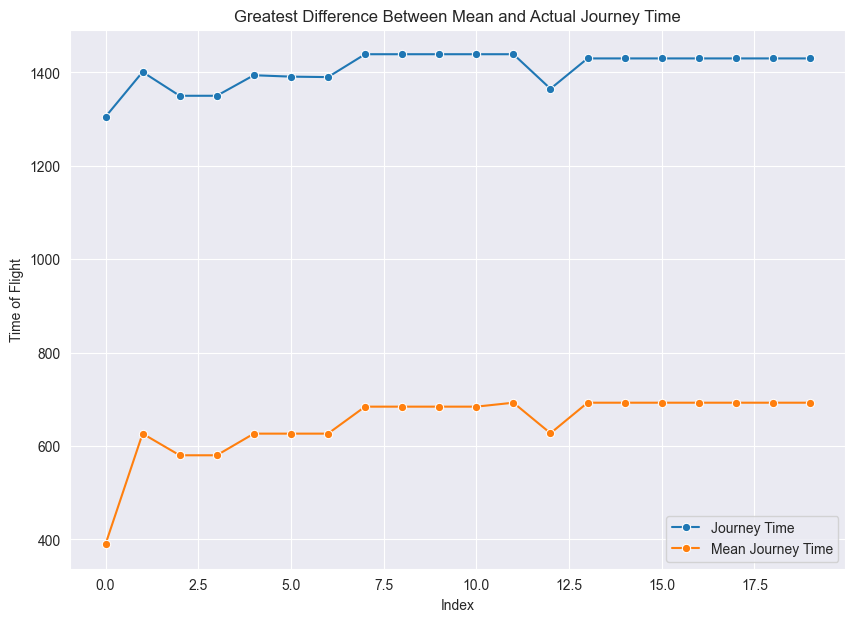

In [4]:
mean_journey_time = flight_data[['AirportFrom', 'AirportTo', 'Time']].groupby(['AirportFrom', 'AirportTo']).Time.mean().reset_index().rename(columns={'Time':'Mean Journey Time'}) #Groups data by origin and destination airport and computes the mean journey time for each combination

#mean_journey_time.head()
left = flight_data.set_index(['AirportFrom', 'AirportTo']) #Defines what to join on
right = mean_journey_time.set_index(['AirportFrom', 'AirportTo']) #Defines what to join on from right dataframe/table

with_mean = left.join(right) #Joins the dataframes where the defined values match



with_mean['Time Difference'] = with_mean['Time'] - with_mean['Mean Journey Time'] #calculates difference between mean and actual journey time and saves it as an additional column

delayed_most = with_mean.sort_values(by=['Time Difference'], ascending=False).drop_duplicates().iloc[0:20].reset_index() #Sorts to include the largest time difference first

delayed_most.index.name = 'Index'

plt.figure(figsize = (10,7))
plt.title('Greatest Difference Between Mean and Actual Journey Time')
sns.lineplot(data=delayed_most['Time'], marker='o', label='Journey Time')
sns.lineplot(data=delayed_most['Mean Journey Time'], marker='o', label='Mean Journey Time')
plt.ylabel('Time of Flight')

delayed_most

6. Which Airline has the highest proportion of delayed flights?

<Axes: title={'center': 'Proportion of flights that are delayed by Airline'}, xlabel='Airline', ylabel='Proportion'>

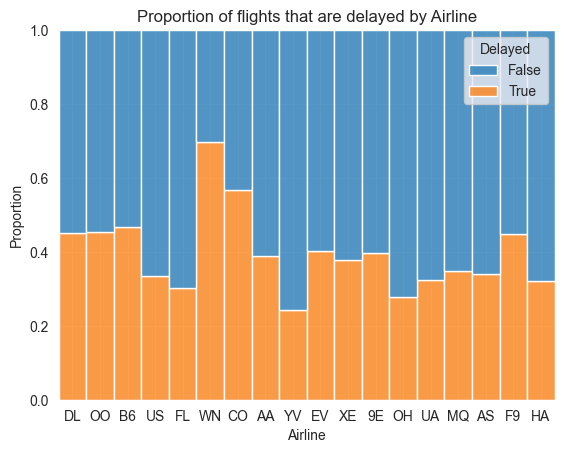

In [37]:
plt.title('Proportion of flights that are delayed by Airline')
sns.histplot(data=delay_data, x='Airline', hue='Delayed', stat='proportion', multiple='fill')


7. Which Airlines have the highest average speed?

<Axes: title={'center': 'Average Speed by Airline'}, xlabel='Airline', ylabel='Speed'>

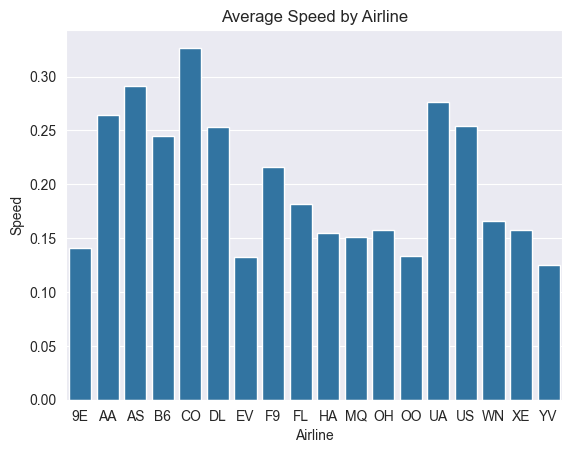

In [3]:
flight_data= flight_data.rename(columns={'Length':'Distance'})
flight_data.head()

flight_data['Speed'] = flight_data['Distance'] / flight_data['Time']
flight_data.head()



flight_data.head()

MeanSpeedByAirline = flight_data.groupby('Airline').Speed.mean().reset_index()
plt.title('Average Speed by Airline')
sns.barplot(data=MeanSpeedByAirline, x='Airline', y='Speed')



8. How does Distance Vs Time vary between Airlines (Interactive)

['DL' 'OO' 'B6' 'US' 'FL' 'WN' 'CO' 'AA' 'YV' 'EV' 'XE' '9E' 'OH' 'UA'
 'MQ' 'AS' 'F9' 'HA']
Enter the index of the first airline you would like to investigete:
Enter the index of the Airline you would like to compare to:
EV


Text(0.5, 1.0, 'Distance Vs Time')

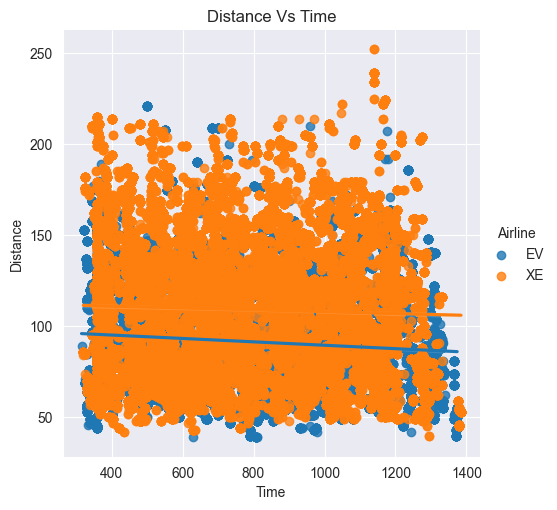

In [5]:
Airlines = flight_data['Airline'].unique()
print(Airlines)
print('Enter the index of the first airline you would like to investigete:')
choice1 = int(input())
print('Enter the index of the Airline you would like to compare to:')
choice2 = int(input())

Airline1 = Airlines[choice1]
Airline2 = Airlines[choice2]

print(Airline1)
JustTwoAirlines = flight_data[flight_data['Airline'].isin([Airline1, Airline2])]
JustTwoAirlines.head()
sns.lmplot(data=JustTwoAirlines, x='Time', y='Distance', hue='Airline')
plt.title('Distance Vs Time')


9. Which Airlines have the greatest number of flights by day?

Text(0.5, 1.0, 'Flights by Airline and Day')

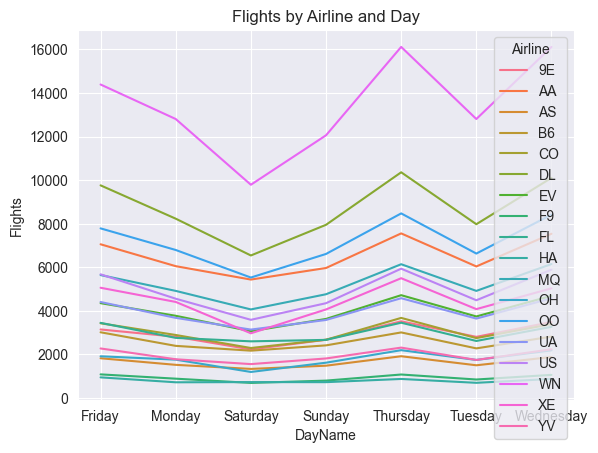

In [189]:
day_as_name.head()
ByAirlineAndDay = day_as_name.groupby(['Airline', 'DayName']).Time.count().reset_index().rename(columns={'Time':'Flights'})
ByAirlineAndDay.head()
sns.lineplot(x='DayName', y='Flights', data=ByAirlineAndDay, hue='Airline')
plt.title('Flights by Airline and Day')

10. What are the most frequent airports travelled to by Airline?

In [75]:
FlightsToAirportByAirline = flight_data.groupby(['Airline', 'AirportTo']).Time.count().reset_index().rename(columns={'Time':'Flights'})

FlightsToAirport = flight_data.groupby('AirportTo').Time.count().sort_values(ascending=False).iloc[0:20].reset_index().rename(columns={'Time':'Flights'})

FlightsToAirportByAirline20 = FlightsToAirportByAirline[FlightsToAirportByAirline['AirportTo'].isin(FlightsToAirport.AirportTo)]

FlightsToAirportByAirline20

Airlines1 = FlightsToAirportByAirline20.Airline.unique()
for airline in Airlines1:
    print(airline)

Airports1 = FlightsToAirportByAirline20.AirportTo.unique()
for airport in Airports1:
    print(airport)

FlightsToAirportByAirline20

9E
AA
AS
B6
CO
DL
EV
F9
FL
HA
MQ
OH
OO
UA
US
WN
XE
YV
ATL
BOS
CLT
DFW
DTW
EWR
IAH
JFK
LGA
MCO
MSP
ORD
BWI
DEN
LAS
LAX
PHX
SEA
SFO
SLC


,Airline,AirportTo,Flights
4,9E,ATL,1195
16,9E,BOS,68
24,9E,CLT,76
33,9E,DFW,31
36,9E,DTW,4245
...,...,...,...
1455,YV,MSP,2
1463,YV,ORD,898
1466,YV,PHX,2460
1482,YV,SFO,74


,ATL,BOS,CLT,DFW,DTW,EWR,IAH,JFK,LGA,MCO,MSP,ORD,BWI,DEN,LAS,LAX,PHX,SEA,SFO,SLC
Airline,,,,,,,,,,,,,,,,,,,,
9E,1195,68,76,31,4245,49,125,547,86,25,1415,82,0,0,0,0,0,0,0,0
AA,445,820,195,12920,211,400,273,1247,1374,833,297,4486,273,429,758,2314,485,363,913,169
AS,31,62,0,91,0,62,31,0,0,62,58,153,0,92,332,479,226,3561,298,0
B6,0,2448,164,0,0,386,0,3805,273,1425,0,180,112,82,258,187,85,151,281,124
CO,139,358,121,225,123,3706,6301,0,271,527,31,474,141,365,413,714,329,398,410,108
DL,15233,1127,454,420,4583,508,155,1634,2082,1620,4604,438,633,604,1069,1648,717,731,753,2737
EV,9756,228,51,16,731,67,97,118,83,0,2,406,30,32,0,0,0,0,0,0
F9,87,83,0,105,88,0,0,0,145,99,118,0,0,2812,221,180,147,132,81,59
FL,5615,571,157,254,166,0,0,0,562,1796,241,0,1534,123,182,165,88,46,109,0


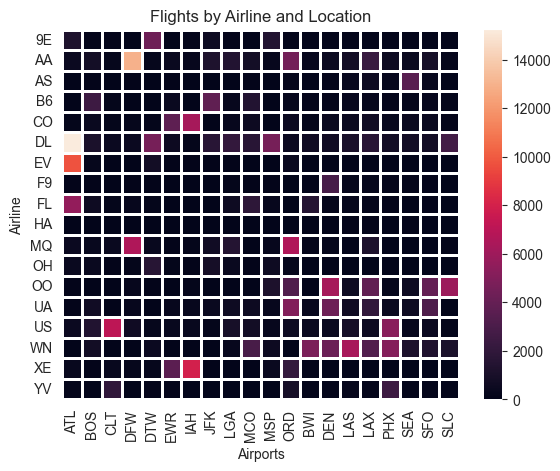

In [74]:
def get_flights(Airport):
    flights = []
    for Airline in Airlines1:
        NumberOfFlights = FlightsToAirportByAirline20[(FlightsToAirportByAirline20['Airline'] == Airline) & (FlightsToAirportByAirline20['AirportTo'] == Airport)].Flights
        if len(NumberOfFlights) == 0:
          flights.append(0)
        else:
         flights.append(int(NumberOfFlights.iloc[0]))
    return flights



flight_dict = {'Airline':Airlines1}
count=0
for Airport in Airports1:
    flight_dict[Airports1[count]] = get_flights(Airports1[count])
    count+=1

flight_frame = pd.DataFrame(flight_dict).set_index('Airline')


sns.heatmap(data=flight_frame, linewidths=1, linecolor='white')
plt.xlabel('Airports')
plt.title('Flights by Airline and Location')

flight_frame
